<a href="https://colab.research.google.com/github/AreejShareefi/InformationRetrieval-/blob/main/TaskLab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from __future__ import print_function
from nltk.metrics import *
file1 = open("f1.txt", "r")
file2 = open("f2.txt", "r")
fl1=file1.read()
fl2=file2.read()
f1=fl1.split()
f2=fl2.split()

print("the files:\n file1= "+fl1+"\n file2= "+fl2)

print(accuracy(f1,f2))
setf1=set(f1)
setf2=set(f2)

precision=precision(setf1,setf2)
recall=recall(setf1,setf2)

print('precision = ',precision)
print('recall = ',recall)

f_measure=(2*precision*recall) / (precision+recall)
print('f_measure = ',f_measure)


the files:
 file1= short story in Maimana lived Abdulwahab the son of a villager and a man who decided that he should follow the precept of the  Wise  where  they  have  said Service  is  superior  to  advice  but action is better than anything Abdulwahab heard  continue  paying  the  heavy  taxes  demanded  by their  Khan that the great dam upon the hill which supplied water for their valley would one day collapse and they badly needed a new mosque
 file2= brief and short story Abdul Wahab a resident of Maimana and the son of a villager made the decision to abide by the Wise People's maxim Service is preferable to advise but action is greater than everything Abdul Wahab overheard the villagers lamenting their inability to continue paying the high taxes requested by their Khan the impending collapse of the huge dam supplying their valley with water and the urgent need for a new mosque
0.05333333333333334
precision =  0.5370370370370371
recall =  0.47540983606557374
f_measure =  0.50434

In [17]:
from sklearn.metrics import classification_report 

print(classification_report(f1,f2))

              precision    recall  f1-score   support

       Abdul       0.00      0.00      0.00         0
  Abdulwahab       0.00      0.00      0.00         2
        Khan       0.00      0.00      0.00         1
     Maimana       0.00      0.00      0.00         1
    People's       0.00      0.00      0.00         0
     Service       0.00      0.00      0.00         1
       Wahab       0.00      0.00      0.00         0
        Wise       0.00      0.00      0.00         1
           a       0.33      0.33      0.33         3
       abide       0.00      0.00      0.00         0
      action       0.00      0.00      0.00         1
      advice       0.00      0.00      0.00         1
      advise       0.00      0.00      0.00         0
         and       0.00      0.00      0.00         2
    anything       0.00      0.00      0.00         1
       badly       0.00      0.00      0.00         1
      better       0.00      0.00      0.00         1
       brief       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

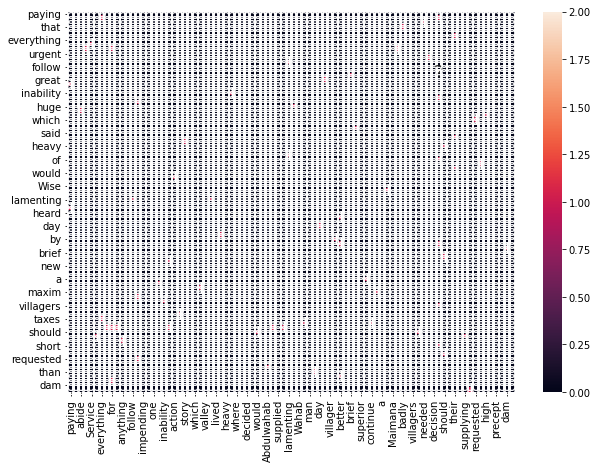

In [18]:
import seaborn as sn 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
col1=set(f1)
col2=set(f2)
dic=col1.union(col2)
array=confusion_matrix(f1,f2)
df_cm = pd.DataFrame(array ,index=dic,columns=dic)
df_cm
plt.figure(figsize = (10,7)) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 

In [19]:
def _edit_dist_init(len1,len2):
  lev=[]
  for i in range(len1):
    lev.append([0]*len2)
  for i in range(len1):
    lev[i][0]=i
  for j in range(len2):
    lev[0][j] =j
  return lev  

In [20]:
def _edit_dist_step(lev,i,j,s1,s2,transpositions=False):
  c1=s1[i-1]
  c2=s2[j-1]
  
  a=lev[i-1][j]+1
  b=lev[i][j-1]+1
  c=lev[i-1][j-1]+(c1!=c2)
  d=c+1
  if transpositions and i>1 and j>1:
    if s1[i-2]==c2 and s2[j-2]==c1:
      d=lev[i-2][j-2]+1
    lev[i][j]=min(a,b,c,d)  

In [23]:
def edit_distance(s1,s2,transpositions=False):
  len1=len(s1)
  len2=len(s2)
  lev=_edit_dist_init(len1+1,len2+1)

  for i in range(len1):
    for j in range(len2):
      _edit_dist_step(lev,i+1,j+1,s1,s2,transpositions=transpositions)
  return lev[len1][len2]    

dis=  edit_distance("advise","advice")
print(dis)

0


In [24]:
def jacc_similarity(query,doc):
  first=set(query).intersection(set(doc))
  second=set(query).union(set(doc))
  return len(first)/len(second)

X=set(f1) 
Y=set(f2) 
print(jacc_similarity(X, Y) )

0.3372093023255814


In [25]:
def binary_distance(label1, label2):
  return 0.0 if label1 == label2 else 1.0

import nltk 
from nltk.metrics import * 
X=set(f1) 
Y=set(f2) 
binary_distance(X, Y)

1.0

In [26]:
def masi(label1, label2):
  len_intersection = len(label1.intersection(label2)) 
  len_union = len(label1.union(label2)) 
  len_label1 = len(label1) 
  len_label2 = len(label2) 
  if len_label1 == len_label2 and len_label1 == len_intersection:
    m = 1
  elif len_intersection == min(len_label1, len_label2): 
    m = 0.67
  elif len_intersection > 0: 
    m = 0.33
  else:
    m = 0
  return 1 - (len_intersection / float(len_union)) * m
  
   
X=set([10,20,30,40]) 
Y=set([30,50,70]) 
masi(X, Y) 



0.945